<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [8]:
!wget -O survey-results-public.sqlite "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite"

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


#### 2. Connect to the Database


**Install the needed libraries**


In [5]:
!pip install pandas

In [15]:
!pip install matplotlib

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("survey-results-public.sqlite")



"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite"
r = requests.get(url)
with open("survey-results-public.sqlite", "wb") as f:
    f.write(r.content)

conn = sqlite3.connect("survey-results-public.sqlite")

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Таблицы в базе:", tables)


Таблицы в базе: [('main',)]


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [2]:
QUERY = "SELECT*FROM main"
df = pd.read_sql_query(QUERY, conn)
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN


In [19]:
QUERY = "SELECT COUNT(*) FROM main"
df1 = pd.read_sql_query(QUERY, conn)
print(df1)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [4]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [21]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [25]:
# your code goes here
Qu1="""
SELECT CompTotal
from main
WHERE CompTotal IS NOT NULL
ORDER BY CompTotal DESC
"""
DF=pd.read_sql_query(Qu1, conn)
DF.head(10)

,CompTotal
0,1.000000e+150
1,1.000000e+65
2,1.000000e+53
3,1.000000e+44
4,8.000000e+27
5,1.000000e+20
6,1.111111e+15
7,3.040302e+14
8,7.587459e+13
9,7.777778e+12


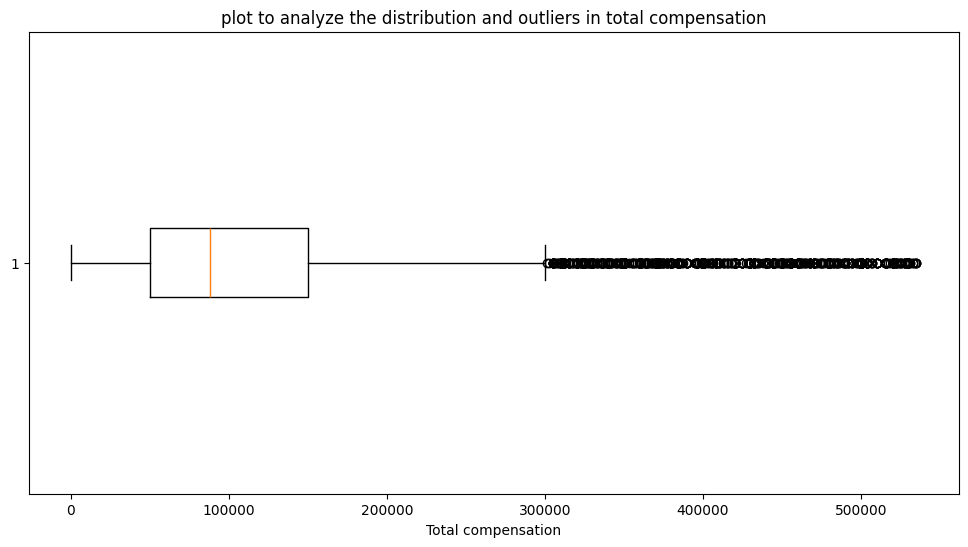

In [85]:
Q1 = DF['CompTotal'].quantile(0.25)
Q3 = DF['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

DF = DF[(DF['CompTotal'] >= lower) & (DF['CompTotal'] <= upper)]
plt.figure(figsize=(12,6))
plt.boxplot(DF['CompTotal'].dropna(), vert=False)
plt.title('plot to analyze the distribution and outliers in total compensation')
plt.xlabel('Total compensation')
plt.show()

Logarifm BOXPLOT

C:\Users\chebo\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


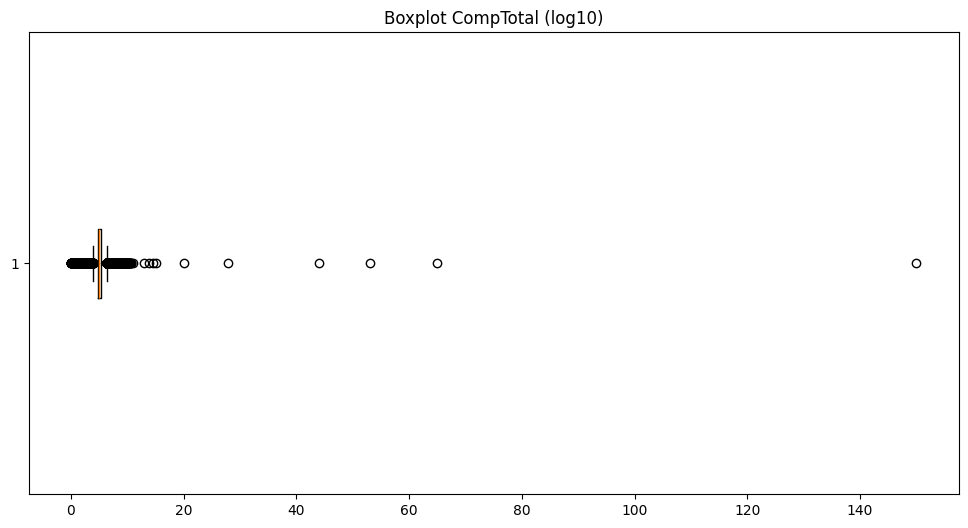

In [16]:
import numpy as np
plt.figure(figsize=(12,6))
plt.boxplot(np.log10(DF['CompTotal'].dropna()), vert=False)
plt.title('Boxplot CompTotal (log10)')
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [42]:
# your code goes here
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

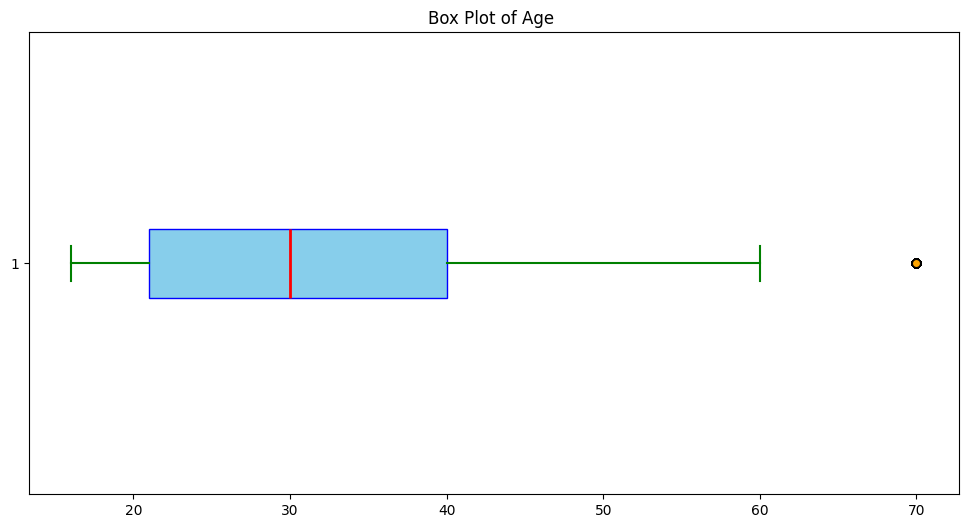

In [49]:
age_numeric = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['AgeNumeric'] = df['Age'].map(age_numeric)
age_data = df['AgeNumeric'].dropna().astype(int)
plt.figure(figsize=(12,6))
plt.boxplot(
    age_data, vert=False, patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='blue'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='green', linewidth=1.5),
    capprops=dict(color='green', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none')
)
plt.title('Box Plot of Age ')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


C:\Users\chebo\AppData\Local\Temp\ipykernel_3988\3372563653.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


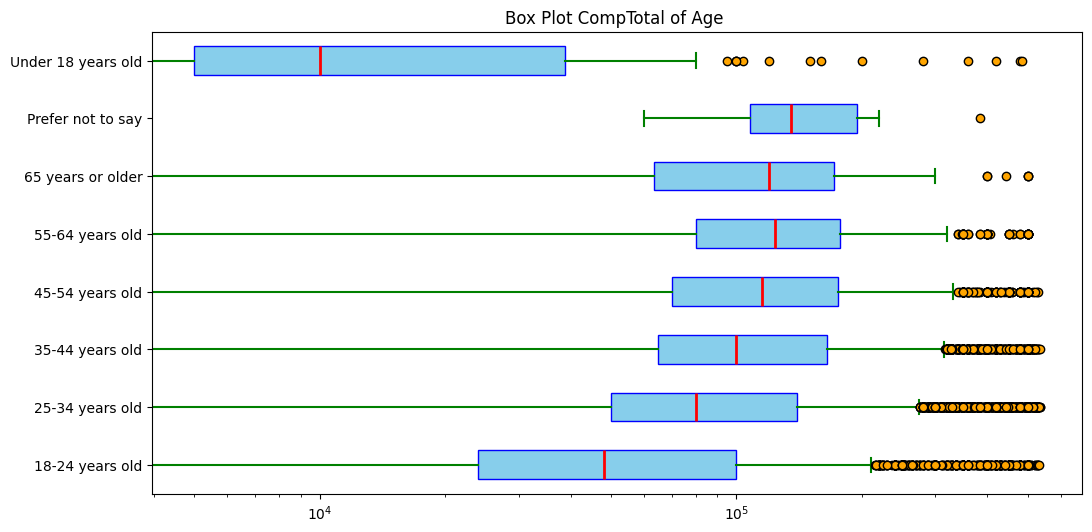

In [84]:
# your code goes here
Qu2="""
SELECT CompTotal, Age
FROM main
WHERE CompTotal IS NOT NULL
Order by Age
"""
data=pd.read_sql_query(Qu2, conn)
Q1 = data['CompTotal'].quantile(0.25)
Q3 = data['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data = data[(data['CompTotal'] >= lower) & (data['CompTotal'] <= upper)]
groups=[data[data['Age']==age]['CompTotal'] for age in data['Age'].unique()]
plt.figure(figsize=(12,6))
plt.boxplot(
    groups,
    labels=data['Age'].unique(),
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='blue'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='green', linewidth=1.5),
    capprops=dict(color='green', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none')
)
plt.title('Box Plot CompTotal of Age ')
plt.xscale('log')
plt.show()

C:\Users\chebo\AppData\Local\Temp\ipykernel_3988\883307756.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


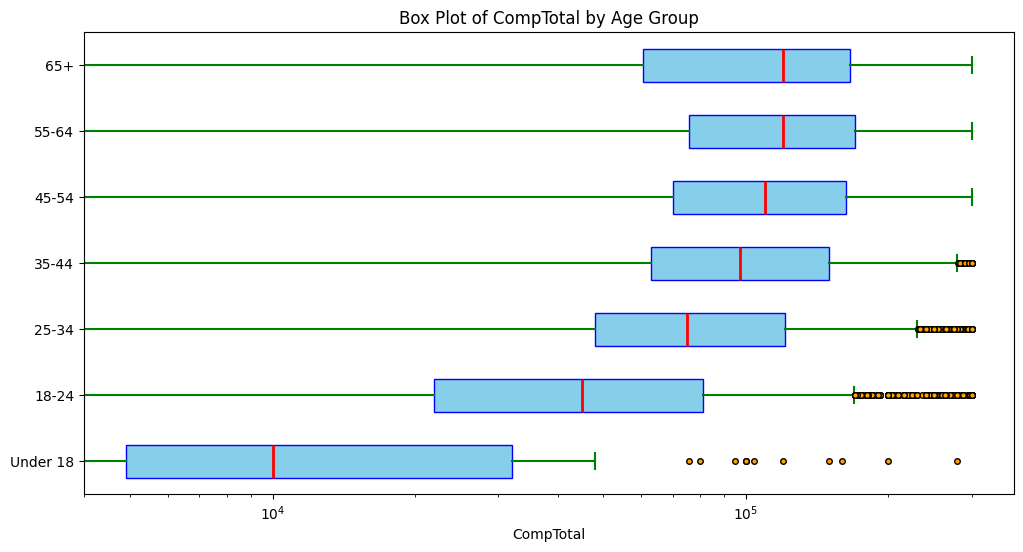

In [86]:
age_map = {
    'Under 18 years old': 'Under 18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+',
    'Prefer not to say': None
}
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['CompTotal'] >= lower) & (df['CompTotal'] <= upper)]

df['Age_group'] = df['Age'].map(age_map)
ordered_categories = ['Under 18','18-24','25-34','35-44','45-54','55-64','65+']
df['Age_group'] = pd.Categorical(df['Age_group'], categories=ordered_categories, ordered=True)
groups = [df[df['Age_group'] == age]['CompTotal'].dropna() for age in ordered_categories]
plt.figure(figsize=(12,6))
plt.boxplot(
    groups, vert=False, patch_artist=True,
    labels=ordered_categories,
    boxprops=dict(facecolor='skyblue', color='blue'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='green', linewidth=1.5),
    capprops=dict(color='green', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=4, linestyle='none')
)
plt.title('Box Plot of CompTotal by Age Group')
plt.xlabel('CompTotal')
plt.xscale('log')
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [72]:
# your code goes here
Qu3="""
SELECT CompTotal, JobSatPoints_6
FROM main
Where CompTotal IS NOT NULL
Group by JobSatPoints_6
order by JobSatPoints_6 DESC
"""
data_2=pd.read_sql_query(Qu3,conn)
data_2.head(20)

,CompTotal,JobSatPoints_6
0,1.200000e+05,100.0
1,3.600000e+05,99.0
2,1.200000e+06,98.0
3,5.600000e+04,97.0
4,3.705600e+04,96.0
5,5.800000e+06,95.0
6,2.400000e+07,94.0
7,5.400000e+06,91.0
8,1.200000e+05,90.0
9,1.200000e+06,89.0


C:\Users\chebo\AppData\Local\Temp\ipykernel_3988\1641718981.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


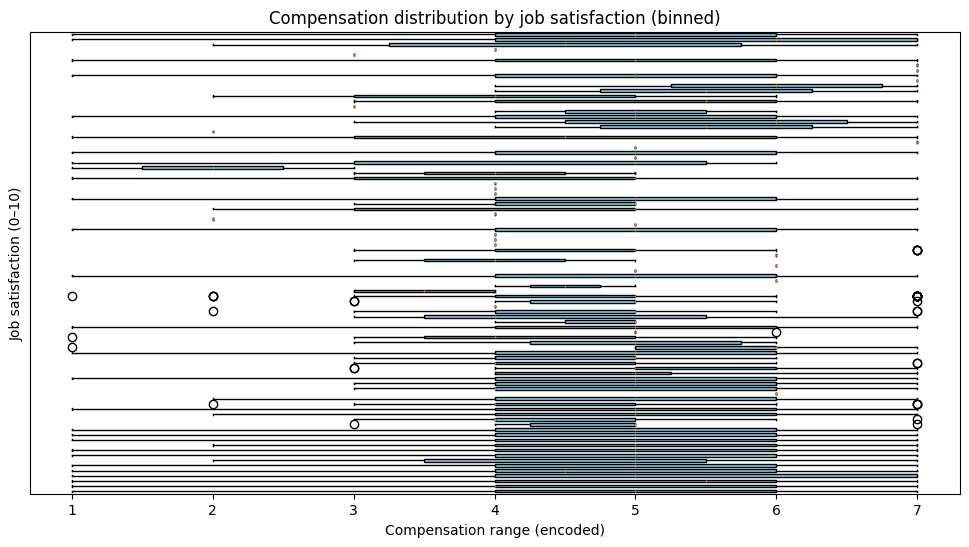

In [76]:
Qu3="""
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL;
"""
data2=pd.read_sql_query(Qu3,conn)
data2.head(20)
bins = [0, 10000, 20000, 50000, 100000, 200000, 1_000_000, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7]

data2['CompBin'] = pd.cut(data2['CompTotal'], bins=bins, labels=labels)

levels = sorted(data2['JobSatPoints_6'].unique())

groups = [
    data2[data2['JobSatPoints_6'] == lvl]['CompBin'].dropna()
    for lvl in levels
]
plt.figure(figsize=(12,6))
plt.boxplot(
    groups,
    labels=levels,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='skyblue')
)

plt.xlabel('Compensation range (encoded)')
plt.ylabel('Job satisfaction (0–10)')
plt.title('Compensation distribution by job satisfaction (binned)')
plt.yticks([])
plt.show()

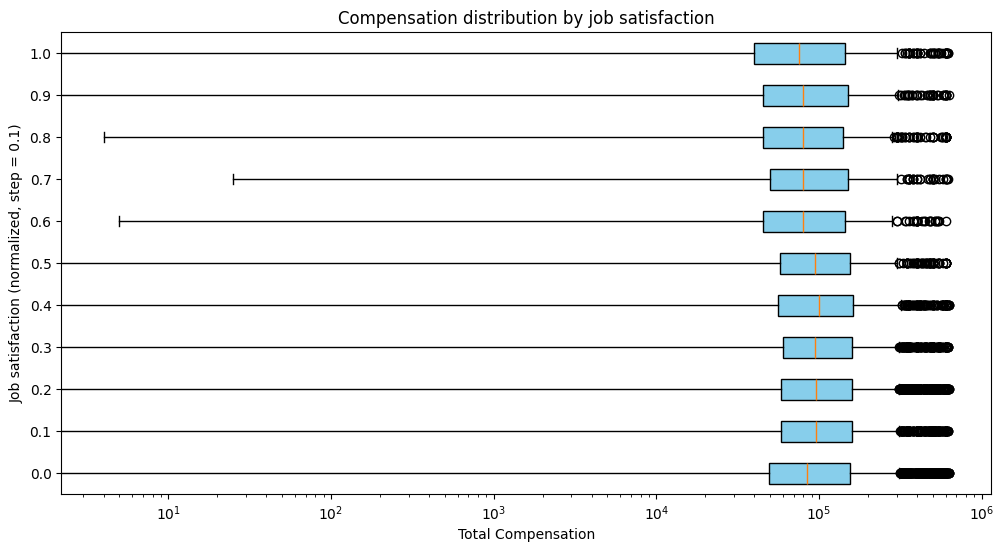

In [89]:
Qu3 = """
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL;
"""
data2 = pd.read_sql_query(Qu3, conn)

q3=data2['CompTotal'].quantile(0.75)
q1=data2['CompTotal'].quantile(0.25)
iqr=q3-q1
lower=q1-1.5*q1
upper=q3+1.5*q3
data2=data2[(data2['CompTotal']>=lower)&(data2['CompTotal']<=upper)]
data2['JobSat_norm'] = (
    data2['JobSatPoints_6'] - data2['JobSatPoints_6'].min()
) / (
    data2['JobSatPoints_6'].max() - data2['JobSatPoints_6'].min()
)
data2['JobSat_01'] = data2['JobSat_norm'].round(1)
levels = sorted(data2['JobSat_01'].unique())

groups = [
    data2[data2['JobSat_01'] == lvl]['CompTotal']
    for lvl in levels
]
plt.figure(figsize=(12,6))
plt.boxplot(
    groups,
    tick_labels=levels,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='skyblue')
)

plt.xlabel('Total Compensation')
plt.ylabel('Job satisfaction (normalized, step = 0.1)')
plt.title('Compensation distribution by job satisfaction')
plt.xscale('log')
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [16]:
# your code goes here
Qu4="""
WITH top_5 as(
SELECT DevType
FROM main
where ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL
group by DevType
ORDER BY COUNT(*) DESC LIMIT 5
)
SELECT ConvertedCompYearly, DevType
from main
where DevType in(select DevType from top_5)
"""
top_d=pd.read_sql_query(Qu4, conn)
top_d

,ConvertedCompYearly,DevType
0,NaN,"Developer, full-stack"
1,NaN,"Developer, full-stack"
2,NaN,"Developer, full-stack"
3,NaN,"Developer, full-stack"
4,NaN,"Developer, back-end"
...,...,...
36046,NaN,"Developer, full-stack"
36047,NaN,"Developer, back-end"
36048,NaN,"Developer, full-stack"
36049,NaN,"Developer, mobile"


<Figure size 1200x600 with 0 Axes>

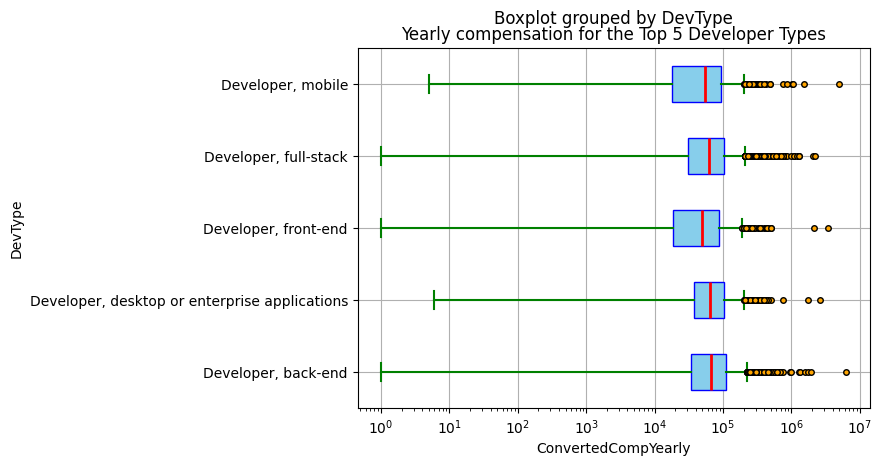

In [25]:
top_dev=df[['DevType','ConvertedCompYearly']].dropna()
top_dev['DevType'] = top_dev['DevType'].str.split(';')
top_dev=top_dev.explode('DevType')

top5=top_dev['DevType'].value_counts().head(5).index
df_top_5=top_dev[top_dev['DevType'].isin(top5)]
df_top_5
plt.figure(figsize=(12,6))
df_top_5.boxplot(
    column='ConvertedCompYearly',by='DevType', vert=False, patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='blue'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='green', linewidth=1.5),
    capprops=dict(color='green', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=4, linestyle='none')
)
plt.title('Yearly compensation for the Top 5 Developer Types')
plt.xlabel('ConvertedCompYearly')
plt.xscale('log')
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Проанализируйте компенсацию среди респондентов из 5 ведущих стран.

In [30]:
Qu4="""
WITH top_countries AS (
    SELECT Country
    FROM main
    WHERE Country IS NOT NULL
    GROUP BY Country
    ORDER BY COUNT(*) DESC
    LIMIT 5
)
SELECT Country, CompTotal
FROM main
WHERE Country IN (SELECT Country FROM top_countries)
  AND CompTotal IS NOT NULL
"""
df_Country=pd.read_sql_query(Qu4,conn)
df_Country

,Country,CompTotal
0,United States of America,110000.0
1,United Kingdom of Great Britain and Northern I...,126420.0
2,United Kingdom of Great Britain and Northern I...,95000.0
3,United States of America,195000.0
4,United Kingdom of Great Britain and Northern I...,145000.0
...,...,...
15210,United States of America,250000.0
15211,United States of America,157000.0
15212,Ukraine,180000.0
15213,Germany,24000.0


<Figure size 1200x600 with 0 Axes>

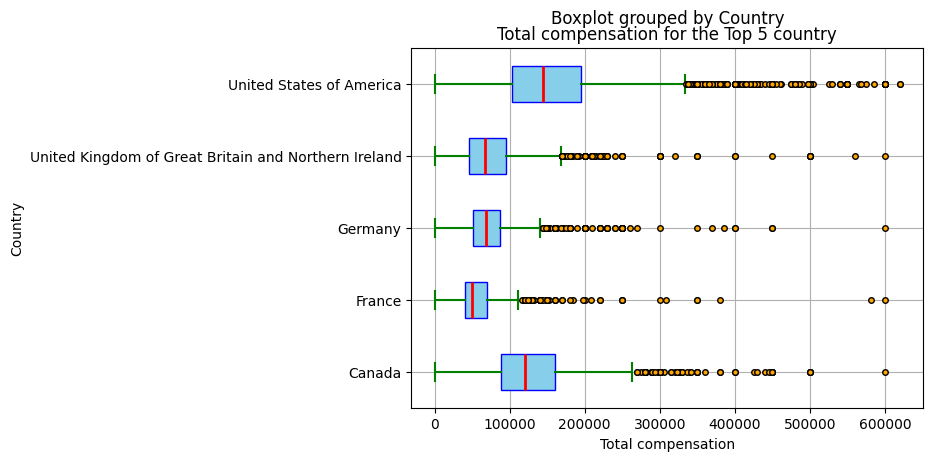

In [29]:
# your code goes here
q3=df['CompTotal'].quantile(0.75)
q1=df['CompTotal'].quantile(0.25)
iqr=q3-q1
lower=q1-1.5*q1
upper=q3+1.5*q3
df=df[(df['CompTotal']>=lower)&(df['CompTotal']<=upper)]
df3=df[['CompTotal', 'Country']].dropna()
top_5c=df3['Country'].value_counts().head(5).index
top_country=df3[df3['Country'].isin(top_5c)]

plt.figure(figsize=(12,6))
top_country.boxplot(
    column='CompTotal',by='Country', vert=False, patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='blue'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='green', linewidth=1.5),
    capprops=dict(color='green', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=4, linestyle='none')
)
plt.title('Total compensation for the Top 5 country')
plt.xlabel('Total compensation')
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [40]:
# your code goes here
df4=df[['Employment','CompTotal']].dropna()
df4['Employment']=df4['Employment'].str.split(';')
df4=df4.explode('Employment')
Em_group=df4.groupby('Employment')['CompTotal'].agg(['mean','median','count'])
Em_group

C:\Users\chebo\AppData\Local\Temp\ipykernel_10548\3987102931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Employment']=df4['Employment'].str.split(';')


,mean,median,count
Employment,,,
"Employed, full-time",129513.437081,92000.0,24460
"Employed, part-time",79437.534473,46000.0,1813
"Independent contractor, freelancer, or self-employed",127649.628999,95000.0,4814
"Not employed, and not looking for work",97589.933333,30500.0,30
"Not employed, but looking for work",109260.964103,62000.0,195
Retired,82918.787879,50000.0,33
"Student, full-time",77100.050926,30000.0,1080
"Student, part-time",83868.245055,50000.0,910


<Figure size 1200x600 with 0 Axes>

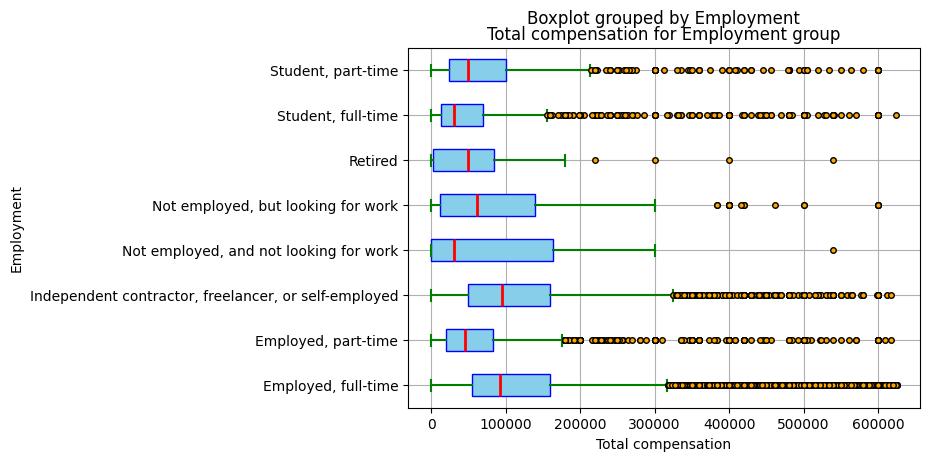

In [43]:
plt.figure(figsize=(12,6))
df4.boxplot(
    column='CompTotal',by='Employment', vert=False, patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='blue'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='green', linewidth=1.5),
    capprops=dict(color='green', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=4, linestyle='none')
)
plt.title('Total compensation for Employment group')
plt.xlabel('Total compensation')
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [70]:
df5_grouped = df5.groupby('YearsCodePro', as_index=False)['JobSatPoints_6'].mean()
df5_grouped = df5_grouped.sort_values(by='YearsCodePro')
df5_grouped.head(10)


,YearsCodePro,JobSatPoints_6
0,1.0,25.992243
1,2.0,25.442279
2,3.0,25.681119
3,4.0,25.772572
4,5.0,24.316528
5,6.0,23.919335
6,7.0,25.442076
7,8.0,25.818515
8,9.0,24.266165
9,10.0,24.273983


<Figure size 1200x4000 with 0 Axes>

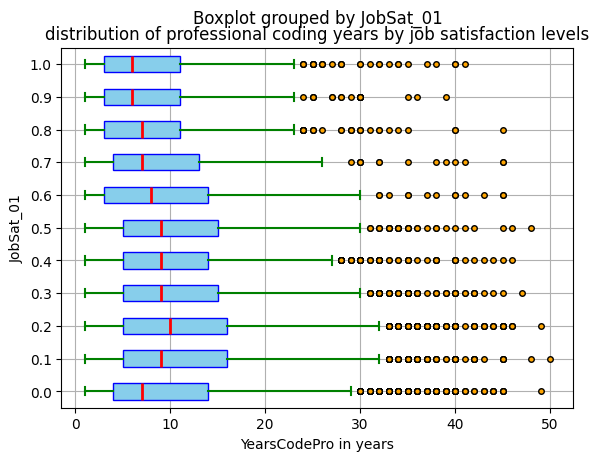

In [62]:
# your code goes here
df5=df[['YearsCodePro', 'JobSatPoints_6']].dropna()
df5['YearsCodePro']=pd.to_numeric(df5['YearsCodePro'], errors='coerce')
df5['JobSat_norm'] = (
    df5['JobSatPoints_6'] - df5['JobSatPoints_6'].min()
) / (
    df5['JobSatPoints_6'].max() - df5['JobSatPoints_6'].min()
)
df5['JobSat_01'] = df5['JobSat_norm'].round(1)
plt.figure(figsize=(12,40))
df5.boxplot(
    column='YearsCodePro',by='JobSat_01', vert=False, patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='blue'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='green', linewidth=1.5),
    capprops=dict(color='green', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=4, linestyle='none')
)
plt.title('distribution of professional coding years by job satisfaction levels')
plt.xlabel('YearsCodePro in years')
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [71]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
